In [ ]:
# Import Libraries
import pandas as pd             # For data loading, cleaning, manipulation
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For basic visualizations
import seaborn as sns           # For statistical plots

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

**Phase 01 - Data Cleaning and EDA**

In [2]:
# Load Dataset 
hotels_df = pd.read_csv( r"D:\ITM_Term5\Hackathon\Internal_Hack\hotels.csv", encoding="latin1")
display(hotels_df.head())

,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,FourStar,Nr. 7 Brigada Viii Street Tirane,NaN,Hotel de Paris is a charming boutique hotel th...,42268822,Private parking Parking onsite Television in c...,41.32213|19.81665,00355 4226 5009,1000,https://www.booking.com/hotel/al/de-paris.html
1,AL,Albania,106078,Albanien,1003301,Hotel Green,FourStar,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,NaN,"Located in a suburb of Tirana, Hotel Green is ...",35548520058,airport pick up wifi available in all areas Ai...,41.30413|19.74703,+35548520057,1041,https://www.booking.com/hotel/al/hotel-green.html
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,ThreeStar,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,NaN,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",00355 (0)42273689,face masks for guests available all plates cu...,41.3216|19.81199,00355 (0)42273766,1019,https://www.booking.com/hotel/al/theranda.html
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,ThreeStar,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",Skanderbeg Square: within 500 metre,This hotel enjoys an enviable setting in Tiran...,NaN,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052,NaN,1001,http://www.hotelseven-tirana.com/
4,AL,Albania,106078,Albanien,1003325,Viktoria,ThreeStar,Rruga E Elbasanit Km 4 Sauk SaukTirana,NaN,Located in a new residential area at the edge ...,+355695406986,internet services Ironing service Family rooms...,41.29125|19.85349,355 69 5406986,1000,https://www.booking.com/hotel/al/viktoria-sauk...


In [3]:
# Display the Number of Records and Columns
print('Rows, Columns:', hotels_df.shape)

Rows, Columns: (1010033, 16)


In [4]:
# Display Column_Name, Datatype, Null Values
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010033 entries, 0 to 1010032
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   countyCode        1009121 non-null  object
 1    countyName       1010033 non-null  object
 2    cityCode         1010033 non-null  int64 
 3    cityName         1010033 non-null  object
 4    HotelCode        1010033 non-null  int64 
 5    HotelName        1010033 non-null  object
 6    HotelRating      1010033 non-null  object
 7    Address          1009931 non-null  object
 8    Attractions      484941 non-null   object
 9    Description      963028 non-null   object
 10   FaxNumber        449686 non-null   object
 11   HotelFacilities  959655 non-null   object
 12   Map              1009103 non-null  object
 13   PhoneNumber      682896 non-null   object
 14   PinCode          979054 non-null   object
 15   HotelWebsiteUrl  759915 non-null   object
dtypes: int64(2), objec

In [5]:
# Total NULL values in each column
hotels_df.isnull().sum()

countyCode             912
 countyName              0
 cityCode                0
 cityName                0
 HotelCode               0
 HotelName               0
 HotelRating             0
 Address               102
 Attractions        525092
 Description         47005
 FaxNumber          560347
 HotelFacilities     50378
 Map                   930
 PhoneNumber        327137
 PinCode             30979
 HotelWebsiteUrl    250118
dtype: int64

In [6]:
# Strip whitespaces & standardize column names
hotels_df.columns = hotels_df.columns.str.strip()

**Remove Unwanted Columns from Dataset**

In [7]:
# Remove unwanted columns
columns_to_drop = ['FaxNumber', 'PhoneNumber', 'PinCode']
hotels_df = hotels_df.drop(columns=columns_to_drop, axis=1)

# Verify
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010033 entries, 0 to 1010032
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   countyCode       1009121 non-null  object
 1   countyName       1010033 non-null  object
 2   cityCode         1010033 non-null  int64 
 3   cityName         1010033 non-null  object
 4   HotelCode        1010033 non-null  int64 
 5   HotelName        1010033 non-null  object
 6   HotelRating      1010033 non-null  object
 7   Address          1009931 non-null  object
 8   Attractions      484941 non-null   object
 9   Description      963028 non-null   object
 10  HotelFacilities  959655 non-null   object
 11  Map              1009103 non-null  object
 12  HotelWebsiteUrl  759915 non-null   object
dtypes: int64(2), object(11)
memory usage: 100.2+ MB


**1. Missing Values in cityCode Column**

In [8]:
# Show the countyNames that still have missing countyCode
hotels_df.loc[hotels_df['countyCode'].isnull(), 'countyName'].unique()

# Fill countyName
hotels_df.loc[hotels_df['countyName'] == 'Namibia', 'countyCode'] = 'NAM'

hotels_df["countyCode"].isnull().sum()

np.int64(0)

**2. Missing Values in Address Column**

In [9]:
# Step 1: Find rows where Address is missing
missing_address = hotels_df[hotels_df['Address'].isnull()]

# Step 2: Get unique HotelCodes with missing Address
missing_address_hotelcodes = missing_address['HotelCode'].unique()
print(missing_address_hotelcodes)

[1398355 1051847 1566286 1536721 1112967 1131921 1108496 1110242 1110735
 1108909 1108935 1111614 1106476 1106544 1106660 1106864 1130345 1106478
 1106659 1006670 1109810 1110492 1010270 1217637 1013142 1134396 1113905
 1107943 1213576 1003399 1111974 1113598 1201653 1111464 1111609 1111980
 1112037 1112300 1112386 1112388 1020088 1207945 1307552 1019054 1210583
 1107571 1112435 1008694 1132809 1008206 1109556 1109561 1109873 1110092
 1111254 1016645 1106467 1106607 1106820 1106929 1107211 1113773 1005076
 1109057 1109065 1109216 1110085 1110120 1111037 1111148 1111938 1113833
 1114711 1000704 1212316 1160492 1211837 1019303 1003236 1109403 1188271
 1114603 1212869 1108421 1109087 1215964 5018207 1074241 1513906 1942791
 1146786 1916793 1196861 1947599 1063131 1086480 1079888]


In [10]:
# List of HotelCodes with missing Address (from previous output)
hotel_codes_missing_address = [
    1398355, 1051847, 1566286, 1536721, 1112967, 1131921, 1108496, 1110242,
    1110735, 1108909, 1108935, 1111614, 1106476, 1106544, 1106660, 1106864,
    1130345, 1106478, 1106659, 1006670, 1109810, 1110492, 1010270, 1217637,
    1013142, 1134396, 1113905, 1107943, 1213576, 1003399, 1111974, 1113598,
    1201653, 1111464, 1111609, 1111980, 1112037, 1112300, 1112386, 1112388,
    1020088, 1207945, 1307552, 1019054, 1210583, 1107571, 1112435, 1008694,
    1132809, 1008206, 1109556, 1109561, 1109873, 1110092, 1111254, 1016645,
    1106467, 1106607, 1106820, 1106929, 1107211, 1113773, 1005076, 1109057,
    1109065, 1109216, 1110085, 1110120, 1111037, 1111148, 1111938, 1113833,
    1114711, 1000704, 1212316, 1160492, 1211837, 1019303, 1003236, 1109403,
    1188271, 1114603, 1212869, 1108421, 1109087, 1215964, 5018207, 1074241,
    1513906, 1942791, 1146786, 1916793, 1196861, 1947599, 1063131, 1086480, 1079888
]

# Check if these HotelCodes have any non-missing Address in hotels_df
missing_address_check = hotels_df[hotels_df['HotelCode'].isin(hotel_codes_missing_address)].groupby('HotelCode')['Address'].apply(lambda x: x.notnull().any())

print(missing_address_check)

HotelCode
1000704    False
1003236    False
1003399    False
1005076    False
1006670    False
           ...  
1566286    False
1916793    False
1942791    False
1947599    False
5018207    False
Name: Address, Length: 97, dtype: bool


In [11]:
# Fill these missing addresses using placeholder 'Not Available'
hotels_df['Address'] = hotels_df['Address'].fillna('Not Available')

# Verify if all missing 'Address' values have been filled
print(f"Number of missing 'Address' values after filling: {hotels_df['Address'].isnull().sum()}")

Number of missing 'Address' values after filling: 0


**3. Missing Values in Attractions Column**

In [12]:
# Step 1: Find rows where Attractions is missing
missing_attractions = hotels_df[hotels_df['Attractions'].isnull()]

# Step 2: Get unique HotelCodes with missing Attractions
missing_attractions_hotelcodes = missing_attractions['HotelCode'].unique()
print(missing_attractions_hotelcodes)

[1003300 1003301 1003302 ... 5678386 5909458 6053177]


In [13]:
# Check if any row for each HotelCode has a non-missing Attractions
attractions_check = hotels_df[hotels_df['HotelCode'].isin(missing_attractions_hotelcodes)].groupby('HotelCode')['Attractions'].apply(lambda x: x.notnull().any())
print(attractions_check)

HotelCode
1000002    False
1000006    False
1000012    False
1000013    False
1000015    False
           ...  
6194311    False
6194327    False
6194357    False
6194370    False
6194373    False
Name: Attractions, Length: 406099, dtype: bool


In [14]:
# Fill these missing attractions using placeholder 'Not Available'
hotels_df['Attractions'] = hotels_df['Attractions'].fillna('Not Available')

# Verify if all missing 'Attractions' values have been filled
print(f"Number of missing 'Attractions' values after filling: {hotels_df['Attractions'].isnull().sum()}")

Number of missing 'Attractions' values after filling: 0


**4. Missing Values in Description Column**

In [15]:
# Rows where Description is missing
missing_description = hotels_df[hotels_df['Description'].isnull()]

# Unique HotelCodes with missing Description
missing_description_hotelcodes = missing_description['HotelCode'].unique()
print(missing_description_hotelcodes)

[1040295 1356661 1361435 ... 6053169 1190208 5909458]


In [16]:
# Check if any row per HotelCode has a non-missing Description
description_check = hotels_df[hotels_df['HotelCode'].isin(missing_description_hotelcodes)].groupby('HotelCode')['Description'].apply(lambda x: x.notnull().any())
print(description_check)

HotelCode
1000000    False
1000039    False
1000144    False
1000173    False
1000592    False
           ...  
6194006    False
6194085    False
6194150    False
6194189    False
6194279    False
Name: Description, Length: 37661, dtype: bool


In [17]:
# Fill these missing Description using placeholder 'No Description'
hotels_df['Description'] = hotels_df['Description'].fillna('No Description')

# Verify if all missing 'Description' values have been filled
print(f"Number of missing 'Description' values after filling: {hotels_df['Description'].isnull().sum()}")

Number of missing 'Description' values after filling: 0


**5. Missing Values in HotelFacilities Column**

In [18]:
# Rows where HotelFacilities is missing
missing_facilities = hotels_df[hotels_df['HotelFacilities'].isnull()]

# Unique HotelCodes with missing HotelFacilities
missing_facilities_hotelcodes = missing_facilities['HotelCode'].unique()
print(missing_facilities_hotelcodes)

[1040295 1357608 1361435 ... 5948579 6053169 5909458]


In [19]:
# Check if any row per HotelCode has a non-missing HotelFacilities
facilities_check = hotels_df[hotels_df['HotelCode'].isin(missing_facilities_hotelcodes)].groupby('HotelCode')['HotelFacilities'].apply(lambda x: x.notnull().any())
print(facilities_check)

HotelCode
1000039    False
1000074    False
1000144    False
1000173    False
1000594    False
           ...  
6193143    False
6193164    False
6193324    False
6193647    False
6193968    False
Name: HotelFacilities, Length: 40298, dtype: bool


In [20]:
# Fill these missing HotelFacilities using placeholder 'No Facilities Info'
hotels_df['HotelFacilities'] = hotels_df['HotelFacilities'].fillna('No Facilities Info')

# Verify if all missing 'HotelFacilities' values have been filled
print(f"Number of missing 'HotelFacilities' values after filling: {hotels_df['HotelFacilities'].isnull().sum()}")

Number of missing 'HotelFacilities' values after filling: 0


**6. Missing Values in HotelWebsiteURL**

In [21]:
# Rows where HotelWebsiteUrl is missing
missing_website = hotels_df[hotels_df['HotelWebsiteUrl'].isnull()]

# Unique HotelCodes with missing HotelWebsiteUrl
missing_website_hotelcodes = missing_website['HotelCode'].unique()
print(missing_website_hotelcodes)

[1092742 1115641 1190885 ... 6008100 6092731 6105635]


In [22]:
# Check if any row per HotelCode has a non-missing HotelWebsiteUrl
website_check = hotels_df[hotels_df['HotelCode'].isin(missing_website_hotelcodes)].groupby('HotelCode')['HotelWebsiteUrl'].apply(lambda x: x.notnull().any())
print(website_check)

HotelCode
1000012    False
1000013    False
1000028    False
1000039    False
1000076    False
           ...  
6194314    False
6194315    False
6194333    False
6194334    False
6194366    False
Name: HotelWebsiteUrl, Length: 196150, dtype: bool


In [23]:
# Fill these missing HotelWebsiteUrl using placeholder 'No Website'
hotels_df['HotelWebsiteUrl'] = hotels_df['HotelWebsiteUrl'].fillna('No Website')

# Verify if all missing 'HotelWebsiteUrl' values have been filled
print(f"Number of missing 'HotelWebsiteUrl' values after filling: {hotels_df['HotelWebsiteUrl'].isnull().sum()}")

Number of missing 'HotelWebsiteUrl' values after filling: 0


**7. Missing Values in Map Column**

In [24]:
# Rows where Map is missing
missing_map = hotels_df[hotels_df['Map'].isnull()]

# Unique HotelCodes with missing Map
missing_map_hotelcodes = missing_map['HotelCode'].unique()
print(missing_map_hotelcodes)

[5001482 5010891 5016760 5016759 1476430 5008265 5008336 5016373 5005315
 5005343 5005511 1443719 5016634 1467613 5007183 5016631 1444211 5015763
 5007197 1471462 1474366 5018306 5017877 1488749 1478442 5006087 5005899
 5005901 5003364 5005993 5007644 5017312 5006122 1478485 5017912 5006702
 5016039 5016068 5008721 5008726 5008742 5008751 5008761 5008762 5008764
 5010336 5016048 5009725 5005674 5009776 5009814 5009860 5009863 5009866
 5009873 5009882 5009887 5009907 5009908 5009915 5016991 5016001 5017562
 5009959 5009962 5009965 5010004 5010315 5010070 5010089 5010091 5010095
 5010209 5017921 5006694 5017582 5007173 5003837 5007323 5007324 5007325
 5007330 5007347 5007351 5017611 5007672 5007675 5015287 5003865 1440508
 5010600 5010328 5010330 5010331 5010333 5010337 5010386 5010445 5010448
 5010453 5017916 5005664 5010005 5010068 5010532 5010539 5010645 5010649
 5010651 5007749 5011179 5017918 5010999 5010482 5017628 5007545 5010083
 5010458 5015952 5007058 5005615 5016071 5006086 11

In [25]:
# Check if any row per HotelCode has a non-missing Map
map_check = hotels_df[hotels_df['HotelCode'].isin(missing_map_hotelcodes)].groupby('HotelCode')['Map'].apply(lambda x: x.notnull().any())
print(map_check)

HotelCode
1125437    False
1129003    False
1167759    False
1168694    False
1174620    False
           ...  
5019848    False
5019851    False
5125676    False
5358156    False
5576289    False
Name: Map, Length: 788, dtype: bool


In [26]:
# Fill these missing Map using placeholder 'No Map'
hotels_df['Map'] = hotels_df['Map'].fillna('No Map')

# Verify if all missing 'Map' values have been filled
print(f"Number of missing 'Map' values after filling: {hotels_df['Map'].isnull().sum()}")

Number of missing 'Map' values after filling: 0


**8. Final Check Missing Values = 0;**

In [27]:
hotels_df.isnull().sum()

countyCode         0
countyName         0
cityCode           0
cityName           0
HotelCode          0
HotelName          0
HotelRating        0
Address            0
Attractions        0
Description        0
HotelFacilities    0
Map                0
HotelWebsiteUrl    0
dtype: int64

**Exploratory Analysis**

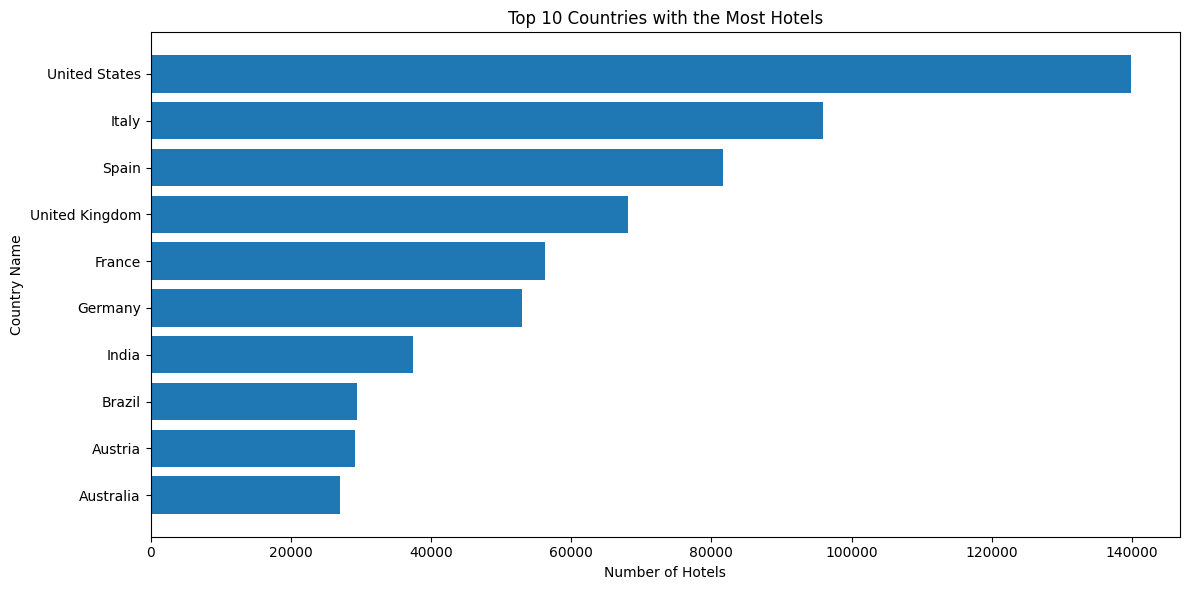

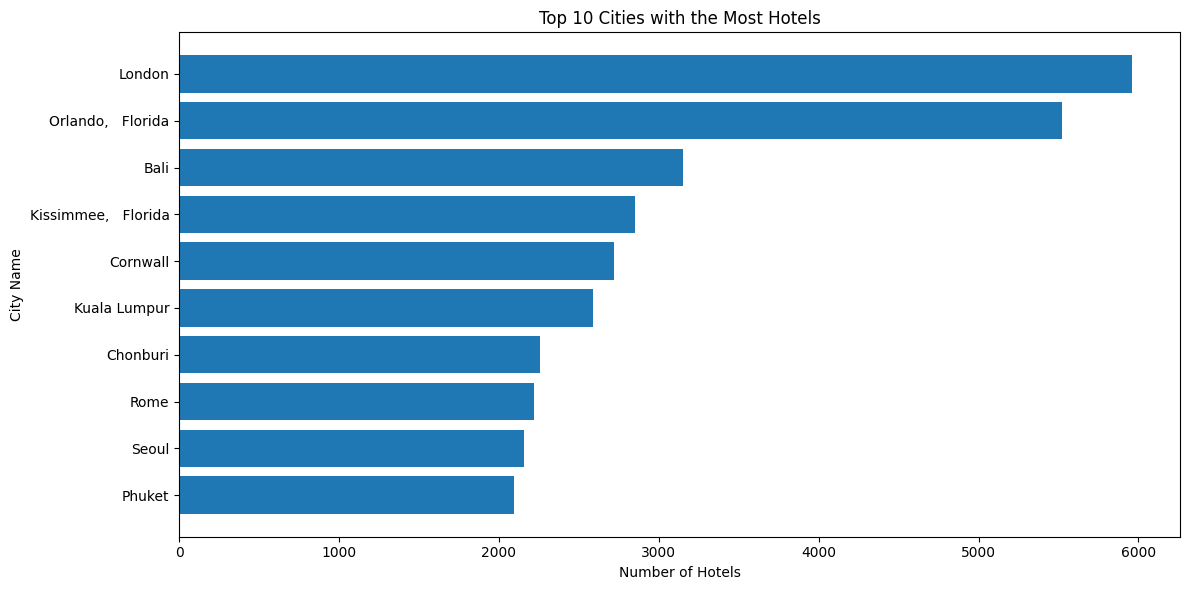

In [55]:
# TOP 10 COUNTRIES
top_countries = (hotels_df['countyName']
                 .value_counts()
                 .head(10)
                 .reset_index())
top_countries.columns = ['Country Name', 'Number Of Hotels']

plt.figure(figsize=(12, 6))
plt.barh(top_countries['Country Name'], top_countries['Number Of Hotels'])
plt.xlabel("Number of Hotels")
plt.ylabel("Country Name")
plt.title("Top 10 Countries with the Most Hotels")
plt.gca().invert_yaxis()  # Highest value on top
plt.tight_layout()
plt.show()


# TOP 10 CITIES 
top_cities = (hotels_df['cityName']
              .value_counts()
              .head(10)
              .reset_index())
top_cities.columns = ['City Name', 'Number Of Hotels']

plt.figure(figsize=(12, 6))
plt.barh(top_cities['City Name'], top_cities['Number Of Hotels'])
plt.xlabel("Number of Hotels")
plt.ylabel("City Name")
plt.title("Top 10 Cities with the Most Hotels")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Interpretation**

1.	Top 10 Counties based on Hotel Count
-	These countries represent large tourism economies.
-	They have high hotel supply, which can mean:
•	high competition
•	presence of Premium, luxury, & budget hotels
•	strong tourism infrastructure

2.	Top 10 Cities based on Hotel Count
-	The cities with highest hotel counts are top global tourist hotspots.
-	Many of them (London, Orlando, Bali, Rome, Phuket) have:
•	High domestic & international tourism
•	Thousands of hotels competing

-	These are oversupplied markets → very competitive.


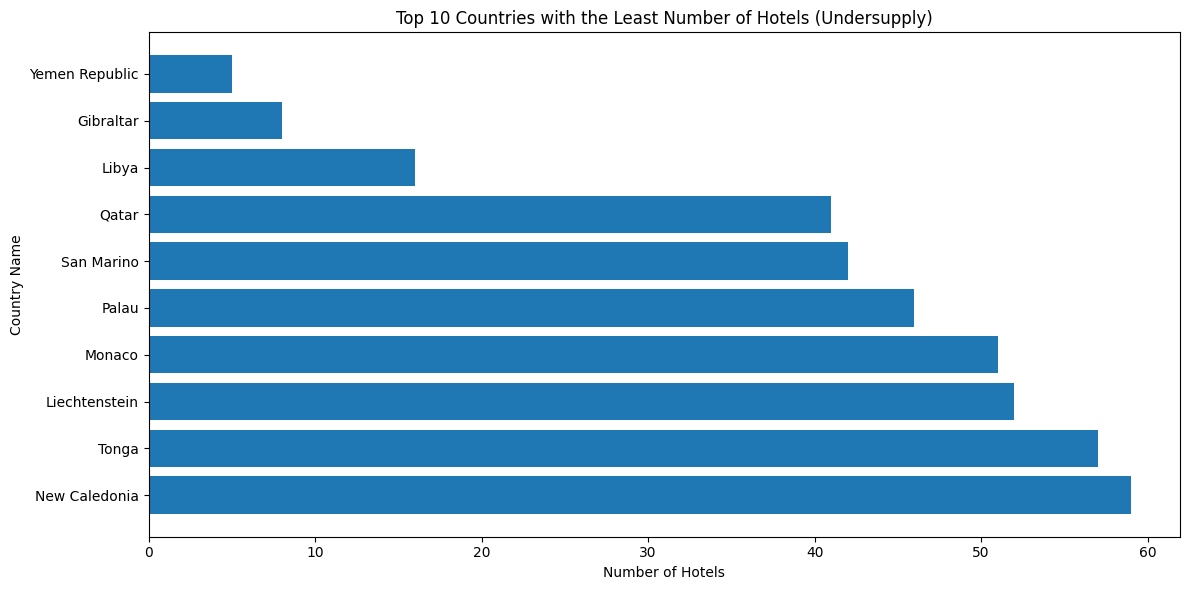

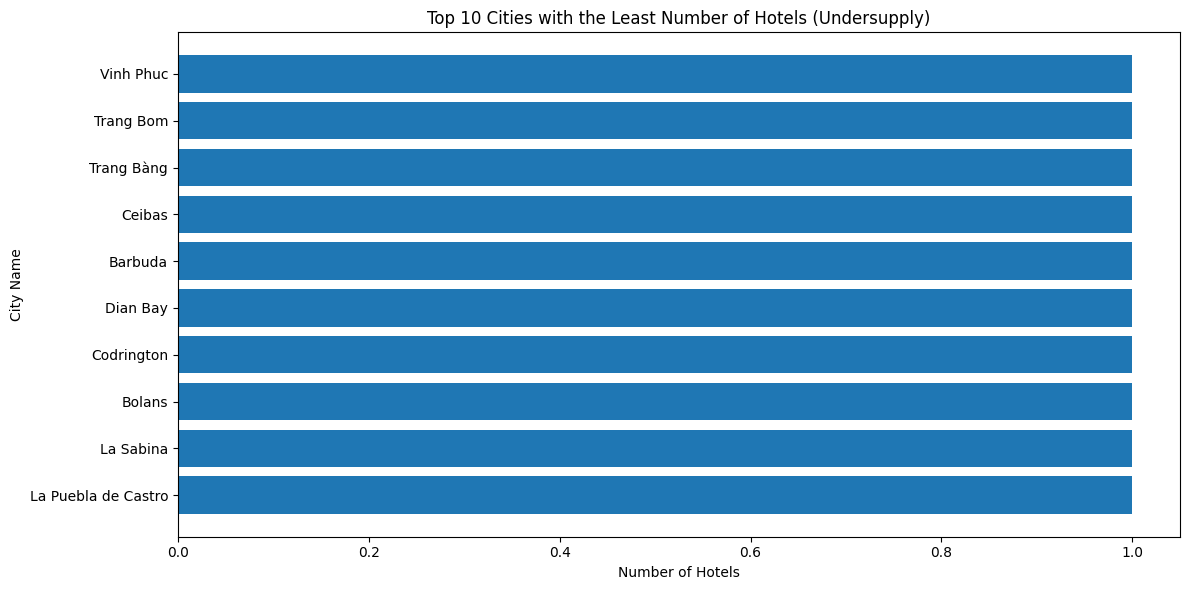

In [56]:
# TOP 10 COUNTRIES WITH LEAST HOTELS ----------
least_countries = (hotels_df['countyName']
                   .value_counts()
                   .tail(10)            # Bottom 10
                   .reset_index())
least_countries.columns = ['Country Name', 'Number Of Hotels']

plt.figure(figsize=(12, 6))
plt.barh(least_countries['Country Name'], least_countries['Number Of Hotels'])
plt.xlabel("Number of Hotels")
plt.ylabel("Country Name")
plt.title("Top 10 Countries with the Least Number of Hotels (Undersupply)")
plt.tight_layout()
plt.show()


# TOP 10 CITIES WITH LEAST HOTELS ----------
least_cities = (hotels_df['cityName']
                .value_counts()
                .tail(10)              # Bottom 10
                .reset_index())
least_cities.columns = ['City Name', 'Number Of Hotels']

plt.figure(figsize=(12, 6))
plt.barh(least_cities['City Name'], least_cities['Number Of Hotels'])
plt.xlabel("Number of Hotels")
plt.ylabel("City Name")
plt.title("Top 10 Cities with the Least Number of Hotels (Undersupply)")
plt.tight_layout()
plt.show()

**Interpretation** 

- Cities/Countries with few hotels = Potential Opportunities but only if attractions and travel demand exist


| Category                           | Meaning                       |
| ---------------------------------- | ----------------------------- |
| **High Attractions + Low Hotels**  | Best Investment Opportunity |
| **Low Attractions + Low Hotels**   | Low demand → Not a target   |
| **High Hotels + High Attractions** | Competitive, mature markets   |
| **High Hotels + Low Attractions**  | Oversupply        |


**Parse location (latitude/longitude)**

In [29]:
# Extract latitude and longitude from the 'Map' column
hotels_df[['Latitude', 'Longitude']] = hotels_df['Map'].str.extract(
    r'([^|]+)\|([^|]+)'   # Capture latitude and longitude separated by |
).astype(float)           # Convert extracted strings to numeric values

# Display first few extracted values
print(hotels_df[['Latitude', 'Longitude']].head())

    Latitude  Longitude
0  41.322130  19.816650
1  41.304130  19.747030
2  41.321600  19.811990
3  41.328027  19.815052
4  41.291250  19.853490


**Rating Distribution**

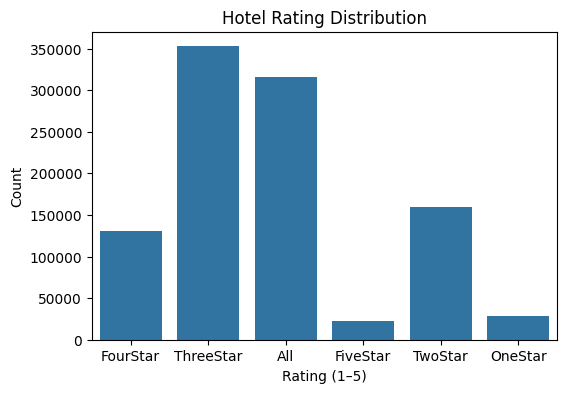

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=hotels_df['HotelRating'])
plt.title("Hotel Rating Distribution")
plt.xlabel("Rating (1–5)")
plt.ylabel("Count")
plt.show()

**Phase 02 - FEATURE ENGINEERING**

**City Popularity Score**

In [34]:
# Create city popularity scores - More hotels in a city - more popular - more expensive.
city_popularity = hotels_df['cityName'].value_counts().rename('city_popularity')

hotels_df = hotels_df.merge(city_popularity, left_on='cityName', right_index=True)

**HotelRating to Numeric Format**

In [35]:
# Clean & Convert HotelRating to Numeric Format

# Step 1 - Check all unique values in HotelRating (before conversion)
print("Unique HotelRating values before conversion:")
display(hotels_df['HotelRating'].unique())

# Step 2 - Convert Using Map
rating_map = {
    'FiveStar': 5,
    'FourStar': 4,
    'ThreeStar': 3,
    'TwoStar': 2,
    'OneStar': 1,
    'All': 0
}

# Ensure the column is of string type, strip any whitespace, then map
hotels_df['HotelRating'] = hotels_df['HotelRating'].astype(str).str.strip().map(rating_map)

# Step 3 - Verify Conversion
print("\nUnique HotelRating values after conversion:")
display(hotels_df['HotelRating'].unique())
print("\nValue counts for HotelRating after conversion:")
display(hotels_df['HotelRating'].value_counts())

Unique HotelRating values before conversion:


array(['FourStar', 'ThreeStar', 'All', 'FiveStar', 'TwoStar', 'OneStar'],
      dtype=object)


Unique HotelRating values after conversion:


array([4, 3, 0, 5, 2, 1])


Value counts for HotelRating after conversion:


HotelRating
3    352613
0    315668
2    159754
4    130862
1     28734
5     22402
Name: count, dtype: int64

**Hotel Facilities Extraction from Text**

In [57]:
# NLP-Based Amenity or Hotel Facilities Extraction Pipeline

import re

# 1. Define standardized amenity categories
amenity_dict = {
    "wifi": [
        "wifi", "free wifi", "internet access", "internet services",
        "wifi available in all areas"
    ],
    "parking": [
        "parking", "free parking", "self parking", "private parking",
        "parking on site"
    ],
    "pool": [
        "pool", "outdoor pool", "indoor pool"
    ],
    "smoke_free": [
        "smoke-free property", "non-smoking", "non-smoking throughout"
    ],
    "pet_friendly": [
        "pets allowed", "pet-friendly"
    ],
    "gym": [
        "fitness facilities", "fitness", "gym"
    ],
    "bar": [
        "bar", "drinking"
    ],
    "restaurant": [
        "restaurant", "dining", "snacking"
    ],
    "air_conditioning": [
        "air conditioning"
    ],
    "multilingual_staff": [
        "multilingual staff", "languages spoken"
    ],
    "breakfast": [
        "breakfast"
    ],
    "kids_services": [
        "for the kids"
    ],
    "transport_access": [
        "getting around"
    ],
    "spa": [
        "spa", "spa services", "massage", "wellness centre", "wellness center"
    ],
    "laundry": [
        "laundry", "laundry service", "dry cleaning", "washing service"
    ]
}

# 2. NLP function to extract amenities from text
def extract_clean_amenities(text):
    """
    Extract clean, standardized amenities from raw hotel facility descriptions.

    Parameters:
        text (str): Raw 'HotelFacilities' text from hotels_df

    Returns:
        list: Cleaned amenity labels such as:
              ['wifi', 'parking', 'smoke_free']
    """
    text = str(text).lower()   # Normalize text
    extracted = []             # Store matched amenity labels

    # Loop through each standardized amenity category
    for clean_label, keywords in amenity_dict.items():
        for keyword in keywords:
            if keyword in text:
                extracted.append(clean_label)
                break  # Stop checking further keywords for this label
    
    return list(set(extracted))  # Remove duplicates

# 3. Apply NLP extraction to hotels_df
hotels_df['clean_amenities'] = hotels_df['HotelFacilities'].apply(extract_clean_amenities) # list of extracted amenities
hotels_df['clean_amenity_count'] = hotels_df['clean_amenities'].apply(len) # number of amenities found

print("\nSample Extracted Amenities:")
print(hotels_df[['HotelFacilities', 'clean_amenities']].head(10))

print("\nTop 20 Extracted Amenities:")
from collections import Counter
all_clean_amenities = Counter([a for sub in hotels_df['clean_amenities'] for a in sub])
print(all_clean_amenities.most_common(20))



Sample Extracted Amenities:
                                     HotelFacilities  \
0  Private parking Parking onsite Television in c...   
1  airport pick up wifi available in all areas Ai...   
2  face masks for guests available all plates  cu...   
3  À la carte dinner Breakfast buffet Breakfast C...   
4  internet services Ironing service Family rooms...   
5  24-hour security Shuttle service Beach Swimmin...   
6  linens  towels and laundry washed in accordanc...   
7  Private parking parking on site Private check-...   
8  Concierge services Terrace Free self parking L...   
9  Concierge services ATM/banking Terrace Compute...   

                                     clean_amenities  
0  [wifi, parking, laundry, pet_friendly, spa, ba...  
1  [wifi, pet_friendly, bar, restaurant, air_cond...  
2  [wifi, parking, laundry, bar, air_conditioning...  
3     [restaurant, bar, air_conditioning, breakfast]  
4  [wifi, laundry, restaurant, bar, air_condition...  
5  [wifi, parking, bar, 

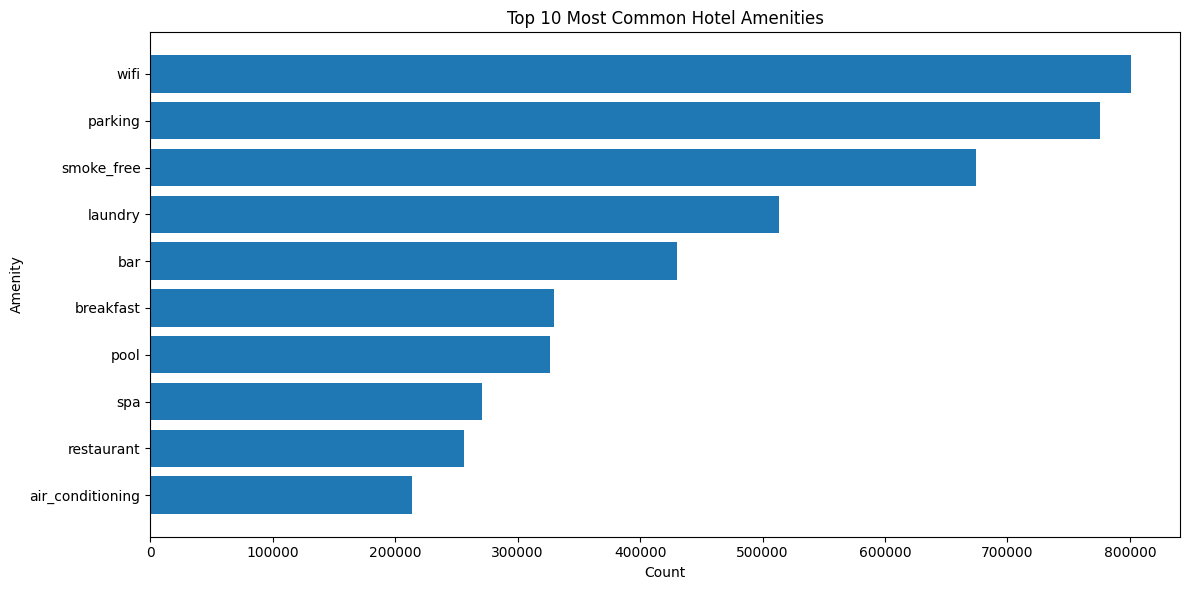

In [58]:
import matplotlib.pyplot as plt
from collections import Counter

# Flatten the list of amenities from all hotels
all_amenities = [amenity for sublist in hotels_df['clean_amenities'] for amenity in sublist]

# Count top amenities
amenity_counts = Counter(all_amenities).most_common(10)

# Separate names and values for plotting
amenity_names = [item[0] for item in amenity_counts]
amenity_values = [item[1] for item in amenity_counts]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(amenity_names, amenity_values)
plt.xlabel("Count")
plt.ylabel("Amenity")
plt.title("Top 10 Most Common Hotel Amenities")
plt.gca().invert_yaxis()  # Highest count on top
plt.tight_layout()
plt.show()


**Hotel Facilities per Record Count**

In [37]:
# Convert Amenities → Numeric without duplicates

from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# 1. Ensure list type
hotels_df['clean_amenities'] = hotels_df['clean_amenities'].apply(
    lambda x: x if isinstance(x, list) else []
)

# 2. Amenity count
hotels_df['clean_amenity_count'] = hotels_df['clean_amenities'].apply(len)

# 3. Multi-hot encode amenities
mlb = MultiLabelBinarizer()
amenity_encoded = mlb.fit_transform(hotels_df['clean_amenities'])

amenity_numeric_df = pd.DataFrame(
    amenity_encoded,
    columns=mlb.classes_,
    index=hotels_df.index
)

# 4. Remove any duplicate columns BEFORE merging
existing_cols = set(hotels_df.columns)
new_cols = set(amenity_numeric_df.columns)

duplicate_cols = list(existing_cols.intersection(new_cols))

if duplicate_cols:
    hotels_df.drop(columns=duplicate_cols, inplace=True)

# 5. Now concatenate safely
hotels_df = pd.concat([hotels_df, amenity_numeric_df], axis=1)

print(hotels_df.head())


  countyCode countyName  cityCode  cityName  HotelCode       HotelName  \
0         AL    Albania    106078  Albanien    1003300  De Paris Hotel   
1         AL    Albania    106078  Albanien    1003301     Hotel Green   
2         AL    Albania    106078  Albanien    1003302  Theranda Hotel   
3         AL    Albania    106078  Albanien    1003303     Seven Hotel   
4         AL    Albania    106078  Albanien    1003325        Viktoria   

   HotelRating                                            Address  \
0            4                  Nr. 7 Brigada Viii Street Tirane    
1            4  Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...   
2            3  Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...   
3            3       KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA    
4            3            Rruga E Elbasanit Km 4 Sauk SaukTirana    

                            Attractions  \
0                         Not Available   
1                         Not Available   
2          

In [38]:
# Column Information
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010033 entries, 0 to 1010032
Data columns (total 34 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   countyCode           1010033 non-null  object 
 1   countyName           1010033 non-null  object 
 2   cityCode             1010033 non-null  int64  
 3   cityName             1010033 non-null  object 
 4   HotelCode            1010033 non-null  int64  
 5   HotelName            1010033 non-null  object 
 6   HotelRating          1010033 non-null  int64  
 7   Address              1010033 non-null  object 
 8   Attractions          1010033 non-null  object 
 9   Description          1010033 non-null  object 
 10  HotelFacilities      1010033 non-null  object 
 11  Map                  1010033 non-null  object 
 12  HotelWebsiteUrl      1010033 non-null  object 
 13  Latitude             1009101 non-null  float64
 14  Longitude            1009101 non-null  float64
 15

**Normalize Engineered Features & Compute Final Location Score**

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a final composite score
df_final = hotels_df.copy()

# 1️. Select the columns needed for scoring
features = ["HotelRating", "clean_amenity_count", "desc_len", "city_popularity"]

# Replace missing or invalid values (optional but recommended)
df_final[features] = df_final[features].fillna(0)

# 2. Normalize each feature using MinMaxScaler
scaler = MinMaxScaler()
df_final[[f"{col}_norm" for col in features]] = scaler.fit_transform(df_final[features])

# 3️. Apply weights
weights = {
    "HotelRating_norm": 0.40,
    "clean_amenity_count_norm": 0.25,
    "desc_len_norm": 0.20,
    "city_popularity_norm": 0.15
}

# 4️. Compute the weighted composite score
df_final["Final_Composite_Score"] = (
    df_final["HotelRating_norm"]   * weights["HotelRating_norm"] +
    df_final["clean_amenity_count_norm"] * weights["clean_amenity_count_norm"] +
    df_final["desc_len_norm"] * weights["desc_len_norm"] +
    df_final["city_popularity_norm"] * weights["city_popularity_norm"]
)

# 5️. Sort hotels by score (optional)
df_step15 = df_final.sort_values("Final_Composite_Score", ascending=False)

# Display the top 10 highest-scoring hotels
df_final.head(10)


,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,...,restaurant,smoke_free,spa,transport_access,wifi,HotelRating_norm,clean_amenity_count_norm,desc_len_norm,city_popularity_norm,Final_Composite_Score
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,4,Nr. 7 Brigada Viii Street Tirane,Not Available,Hotel de Paris is a charming boutique hotel th...,...,1,1,1,0,1,0.8,0.769231,0.152052,0.134038,0.562824
1,AL,Albania,106078,Albanien,1003301,Hotel Green,4,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,Not Available,"Located in a suburb of Tirana, Hotel Green is ...",...,1,1,0,0,1,0.8,0.461538,0.139925,0.134038,0.483475
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,3,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,Not Available,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",...,0,1,0,0,1,0.6,0.538462,0.088619,0.134038,0.412445
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,3,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",Skanderbeg Square: within 500 metre,This hotel enjoys an enviable setting in Tiran...,...,1,0,0,0,0,0.6,0.307692,0.097948,0.134038,0.356618
4,AL,Albania,106078,Albanien,1003325,Viktoria,3,Rruga E Elbasanit Km 4 Sauk SaukTirana,Not Available,Located in a new residential area at the edge ...,...,1,1,0,0,1,0.6,0.461538,0.201493,0.134038,0.415789
5,AL,Albania,106078,Albanien,1015185,Bel Conti Hotel,4,Shkembi i Kavajes L13 Durres,Not Available,"Just steps away from a private sandy beach, Be...",...,1,1,0,0,1,0.8,0.538462,0.220149,0.134038,0.518751
6,AL,Albania,106078,Albanien,1016188,Pik Loti Hotel,3,Rruga Petro Nini Luarasi Tirana,Not Available,Offering free Wi-Fi and free secured parking i...,...,0,1,0,0,1,0.6,0.538462,0.228545,0.134038,0.440430
7,AL,Albania,106078,Albanien,1016189,Hotel Parlamenti,3,Rruga Jeronim De Rada 75 1001 Tirana,Not Available,Hotel Parlamenti is located in the historic ce...,...,1,0,0,0,1,0.6,0.615385,0.154851,0.134038,0.444922
8,AL,Albania,106078,Albanien,1017483,Victoria,3,Dibra Street 331 331 Tirana,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Ministry of Justice</p><p>L...,...,1,0,1,0,1,0.6,0.615385,0.243470,0.134038,0.462646
9,AL,Albania,106078,Albanien,1032158,MonarC Hotel,4,Intersection. Rr. George W. Bush Road And Blvd...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Tirana Parliament</p><p>Loc...,...,0,0,1,0,1,0.8,0.384615,0.241604,0.134038,0.484580


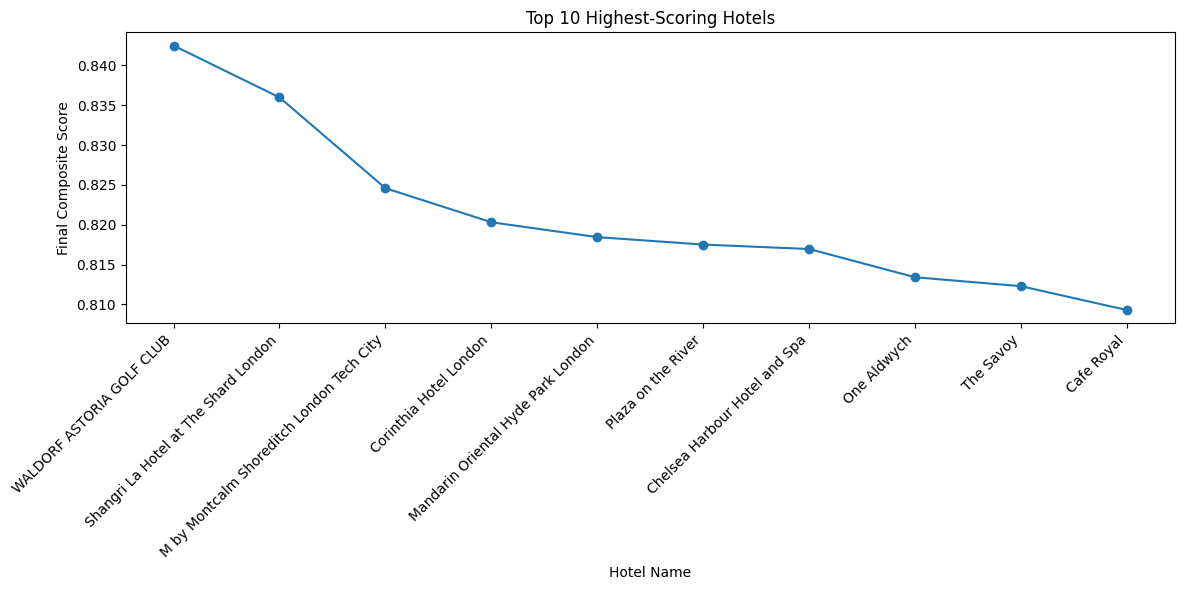

In [60]:
# Top 10 hotels by Composite Score
top10 = df_step15.head(10).copy()

plt.figure(figsize=(12, 6))

# Line plot (NOT bar)
plt.plot(top10["HotelName"], 
         top10["Final_Composite_Score"], 
         marker='o')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Hotel Name")
plt.ylabel("Final Composite Score")
plt.title("Top 10 Highest-Scoring Hotels")
plt.tight_layout()
plt.show()


**Interpretation**

1. The first hotel is clearly the best - (Waldorf Astoria Golf Club) has a higher score than all others.
- This means it: Has very good ratings, Offers many amenities, Is in a popular city, Has a strong overall profile, It stands out from the rest.

2. The next 2–3 hotels are also very strong - Shangri-La and M by Montcalm have scores close to each other.
- This means these hotels are also top-quality and offer a premium experience.

3. After the top 3, scores decrease slowly - The other hotels (positions 5 to 10) have similar quality.
- This shows: These hotels are still very good, The differences between them are small, They compete very closely with each other

**Business Insights**

1. The highest-scoring hotel is a clear leader
- It can attract: High-paying guests, Premium marketing partnerships

2. Many hotels offer similar quality
- So the competition is strong, Hotels need to improve amenities or service to stand out.

3. Even Rank 7–10 hotels are strong options

They still have high potential for: Marketing, Premium listings, Higher pricing (if they add a few more amenities)

4. The score helps identify the best hotels for business

Composite score can help: Travel websites promote top hotels, Hotel chains understand where they stand, Investors see which hotels have strong offerings

**Clustering**

In [67]:
from sklearn.cluster import KMeans

# K-means clustering
df_cluster = df_final.copy()

# Normalized features for clustering
cluster_features = [
    "HotelRating_norm",
    "clean_amenity_count_norm",
    "desc_len_norm",
    "city_popularity_norm"
]

X = df_cluster[cluster_features]

# Run KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Save cluster labels
labels = kmeans.fit_predict(X)

# Add labels to both dataframes
df_cluster["cluster"] = labels
df_final["cluster"] = labels

# Create a summary table with cluster and hotel count
cluster_summary = df_final.groupby("cluster").size().reset_index(name="Hotel_count")

# Sort by cluster number
cluster_summary = cluster_summary.sort_values("cluster").reset_index(drop=True)

print(cluster_summary)


   cluster  Hotel_count
0        0       363220
1        1       302448
2        2       344365


**Interpretation**

Hotels have been grouped into 3 clusters based on normalized features like hotel rating, number of amenities, description length, and city popularity.

- Cluster 0: 363,220 hotels
- Cluster 1: 302,448 hotels
- Cluster 2: 344,365 hotels

In [64]:
# Cluster profiling: calculate mean of original features per cluster
cluster_profile = df_final.groupby("cluster")[[
    "HotelRating",
    "clean_amenity_count",
    "desc_len",
    "city_popularity"
]].mean()

# Add count of hotels per cluster
cluster_profile["hotel_count"] = df_final.groupby("cluster").size()

# Add percentage of total hotels as integer
cluster_profile["percentage"] = (cluster_profile["hotel_count"] / df_final.shape[0] * 100).round(0).astype(int)

# Sort by cluster label
cluster_profile = cluster_profile.sort_index()

print(cluster_profile)


         HotelRating  clean_amenity_count    desc_len  city_popularity  \
cluster                                                                  
0           2.810291             3.318749  172.713903       493.344901   
1           3.280194             7.636331  229.669824       363.373426   
2           0.083333             4.449898  167.299987       323.662126   

         hotel_count  percentage  
cluster                           
0             363220          36  
1             302448          30  
2             344365          34  


**Interpretation**

Cluster 0 (36% of hotels, 363,220 hotels):
- HotelRating: ~2.81 → mid-range hotels
- Amenities: ~3.32 → fewer amenities
- Description length: ~173 → moderate detail
- City popularity: ~493 → located in highly popular cities

Cluster 1 (30% of hotels, 302,448 hotels):
- HotelRating: ~3.28 → higher-rated hotels
- Amenities: ~7.64 → more amenities
- Description length: ~230 → more detailed descriptions
- City popularity: ~363 → less popular cities than cluster 0

Cluster 2 (34% of hotels, 344,365 hotels):
- HotelRating: ~0.08 → very low-rated hotels
- Amenities: ~4.45 → moderate amenities
- Description length: ~167 → shorter descriptions
- City popularity: ~324 → less popular cities

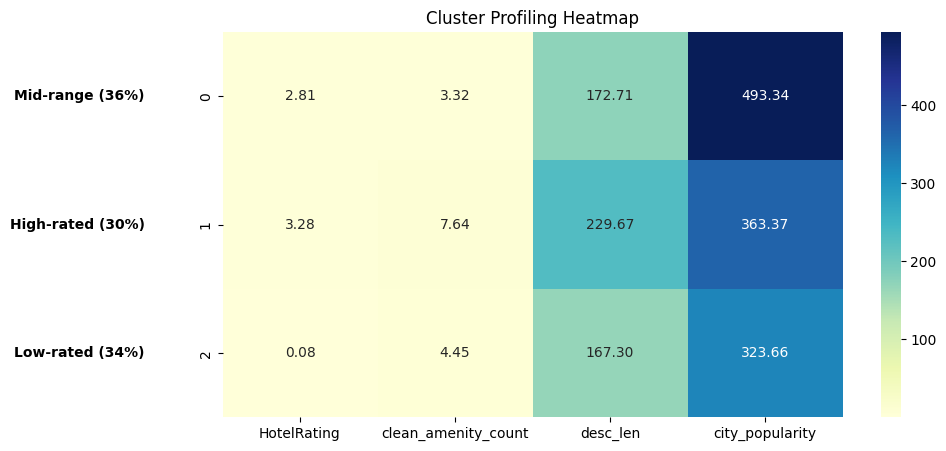

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add cluster type manually based on your interpretation
cluster_profile['Cluster_Type'] = ['Mid-range', 'High-rated', 'Low-rated']

# Select features for heatmap
heatmap_data = cluster_profile[[
    "HotelRating", 
    "clean_amenity_count", 
    "desc_len", 
    "city_popularity"
]]

# Create figure
plt.figure(figsize=(10, 5))

# Draw heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)

# Add cluster type and percentage as x-axis labels
for idx, (ctype, pct) in enumerate(zip(cluster_profile['Cluster_Type'], cluster_profile['percentage'])):
    plt.text(-0.5, idx + 0.5, f"{ctype} ({pct}%)", ha='right', va='center', fontsize=10, weight='bold')

plt.title("Cluster Profiling Heatmap")
plt.ylabel("")
plt.xlabel("")
plt.show()


In [99]:
# Add Cluster Labels Into the Final Dataset

# 1. Use the fitted KMeans model to generate labels
labels = kmeans.labels_

# 2. Add labels to df_final
df_final['cluster'] = labels

# 3. (Optional) Add labels to df_cluster as well
df_cluster['cluster'] = labels

# 4. Check if added correctly
df_final[['HotelName', 'HotelRating', 'cluster']].head()


,HotelName,HotelRating,cluster
0,De Paris Hotel,4,1
1,Hotel Green,4,1
2,Theranda Hotel,3,1
3,Seven Hotel,3,0
4,Viktoria,3,1


In [77]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010033 entries, 0 to 1010032
Data columns (total 41 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   countyCode                1010033 non-null  object 
 1   countyName                1010033 non-null  object 
 2   cityCode                  1010033 non-null  int64  
 3   cityName                  1010033 non-null  object 
 4   HotelCode                 1010033 non-null  int64  
 5   HotelName                 1010033 non-null  object 
 6   HotelRating               1010033 non-null  int64  
 7   Address                   1010033 non-null  object 
 8   Attractions               1010033 non-null  object 
 9   Description               1010033 non-null  object 
 10  HotelFacilities           1010033 non-null  object 
 11  Map                       1010033 non-null  object 
 12  HotelWebsiteUrl           1010033 non-null  object 
 13  Latitude                  1

| Cluster | Star Rating | Rating   | Amenities | Description Length | City Popularity | Type                          |
| ------- | ----------- | -------- | --------- | ------------------ | --------------- | ----------------------------- |
| **0**   | 2★ – 3★     | Medium   | Low       | Medium             | High            | Mid-range / Popular City      |
| **1**   | 3★ – 4★     | High     | High      | Long               | Medium          | High-quality / Many Amenities |
| **2**   | 0★ – 1★     | Very Low | Medium    | Short              | Low             | Low-quality / Budget          |


**Model Training**

In [100]:

# RandomForestRegressor for HotelRating
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


# 1. SELECT FEATURES - Amenity one-hot columns (boolean 0/1)
amenity_cols = [
    'wifi','parking','pool','spa','restaurant','gym','bar','breakfast',
    'air_conditioning','multilingual_staff','pet_friendly','laundry',
    'kids_services','transport_access','smoke_free'
]

# Numerical engineered features
base_features = [
    'clean_amenity_count',
    'desc_len',
    'city_popularity',
    'Latitude',
    'Longitude'
]

# Combine (only those that exist in the dataset)
feature_cols = [c for c in base_features + amenity_cols if c in df_final.columns]

print("Using features:", feature_cols)


# 2. PREPARE MODEL DATAFRAME
df_model = df_final[feature_cols + ['HotelRating', 'cityName']].copy()

# Impute missing coordinates by city mean
for coord in ['Latitude', 'Longitude']:
    df_model[coord] = df_model.groupby('cityName')[coord].transform(
        lambda g: g.fillna(g.mean())
    )
    df_model[coord].fillna(df_model[coord].median(), inplace=True)

# Drop cityName (not required for model)
df_model.drop(columns=['cityName'], inplace=True)

# Drop any remaining missing values
df_model = df_model.dropna().reset_index(drop=True)

print("Training rows:", df_model.shape[0])


# 3. TRAIN-TEST SPLIT
X = df_model[feature_cols]
y = df_model['HotelRating'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


# 4. TRAIN RANDOM FOREST MODEL
rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


## 5. EVALUATION
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

# your sklearn version does NOT support squared=False → compute RMSE manually
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5   # √MSE

r2 = r2_score(y_test, y_pred)

print("\n Random Forest Performance")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# Cross-validation
cv_mae = -cross_val_score(
    rf, X, y, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1
)

print("\n CV MAE (3-fold):", round(cv_mae.mean(), 4))


# 6. FEATURE IMPORTANCE
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

print("\n Top Feature Importances:")
print(importances_sorted.head(20))


# 7. SAVE MODEL
joblib.dump(rf, "RandomForest_HotelRating_Model.joblib")
print("\n Model saved: RandomForest_HotelRating_Model.joblib")


# 8. SAMPLE PREDICTIONS
results = X_test.copy()
results['Actual_Rating'] = y_test.values
results['Predicted_Rating'] = y_pred
results.head(10)

Using features: ['clean_amenity_count', 'desc_len', 'city_popularity', 'Latitude', 'Longitude', 'wifi', 'parking', 'pool', 'spa', 'restaurant', 'gym', 'bar', 'breakfast', 'air_conditioning', 'multilingual_staff', 'pet_friendly', 'laundry', 'kids_services', 'transport_access', 'smoke_free']


C:\Users\digam\AppData\Local\Temp\ipykernel_5776\3872760135.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model[coord].fillna(df_model[coord].median(), inplace=True)
C:\Users\digam\AppData\Local\Temp\ipykernel_5776\3872760135.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

Training rows: 1010033
Train size: (808026, 20) Test size: (202007, 20)

 Random Forest Performance
MAE  : 0.8553
RMSE : 1.1145
R²   : 0.4690

 CV MAE (3-fold): 1.0689

 Top Feature Importances:
Longitude              0.198350
Latitude               0.158682
spa                    0.150954
desc_len               0.113116
bar                    0.078728
air_conditioning       0.069417
pet_friendly           0.036707
city_popularity        0.035631
clean_amenity_count    0.025359
breakfast              0.022710
multilingual_staff     0.019447
smoke_free             0.019263
laundry                0.016259
restaurant             0.013945
gym                    0.013105
pool                   0.011013
wifi                   0.010794
parking                0.006396
kids_services          0.000083
transport_access       0.000040
dtype: float64

 Model saved: RandomForest_HotelRating_Model.joblib


,clean_amenity_count,desc_len,city_popularity,Latitude,Longitude,wifi,parking,pool,spa,restaurant,...,breakfast,air_conditioning,multilingual_staff,pet_friendly,laundry,kids_services,transport_access,smoke_free,Actual_Rating,Predicted_Rating
484636,8,347,12,43.860659,7.969613,1,1,0,1,1,...,1,0,1,0,1,0,0,0,4.0,3.084720
73433,11,364,846,47.334929,11.855272,1,1,1,1,1,...,1,0,1,0,1,0,0,1,4.0,4.136818
457185,4,247,101,37.660746,12.569689,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1.0,1.304909
832995,4,256,189,55.974407,-3.168609,1,1,0,0,0,...,0,0,1,0,0,0,0,1,3.0,2.738582
87611,4,229,611,-27.183310,-48.500560,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0.0,0.285213
490935,6,283,69,43.721285,13.208361,1,1,0,1,0,...,1,0,0,0,1,0,0,0,3.0,2.820568
135210,4,225,433,49.279852,-123.127728,1,1,0,0,0,...,1,0,1,0,0,0,0,0,3.0,2.076407
737438,6,121,444,7.949450,80.751640,1,1,0,0,1,...,1,1,0,0,0,0,0,1,1.0,1.121742
409868,4,177,915,32.075863,34.768075,1,1,0,0,0,...,0,0,0,0,0,0,0,1,2.0,2.533624
420877,4,151,694,45.941490,10.190560,1,1,0,0,0,...,1,0,0,0,0,0,0,1,3.0,1.019392


**Interpretation**

- Model Performance

- MAE ~0.85 → average prediction error is less than 1 star
- RMSE ~1.11 → 1-star error on average
- R² ~0.469 → model explains ~47% variance
- CV MAE ~1.06 → generalized performance (slightly lower)

Reasonable because:
1. HotelRating is integer 1–5
2. Very noisy text-based / amenity-based predictions
3. No price, no user reviews → heavy missing signal

- Feature Importance Interpretation

| Feature                             | Influence                     |
| ----------------------------------- | ----------------------------- |
| **Longitude**                       | Very high                     |
| **Latitude**                        | Very high                     |
| **Spa**                             | Strong indicator of luxury    |
| **Description Length**              | High                          |
| **Bar, AC, Pet Friendly**           | Medium                        |
| **City Popularity**                 | Medium                        |
| **Amenity Count**                   | Medium                        |
| **Kids Services, Transport Access** | Almost zero                   |


- Why are Latitude/Longitude so important?
Geography strongly correlates with:
1. Country → price level → luxury rating
2. Resort locations → higher ratings
3. Rural areas → lower ratings
This is normal.

**HOTEL RATING PREDICTOR**

In [49]:
# HOTEL RATING PREDICTOR — RANDOM FOREST

# Import libraries
import pandas as pd
import numpy as np
from joblib import load

# Load the trained RandomForest model
rf = load("RandomForest_HotelRating_Model.joblib")

# Define required feature columns
feature_columns = [
    'clean_amenity_count', 'desc_len', 'city_popularity',
    'Latitude', 'Longitude',
    'wifi', 'parking', 'pool', 'spa', 'restaurant', 'gym', 'bar',
    'breakfast', 'air_conditioning', 'multilingual_staff', 'pet_friendly',
    'laundry', 'kids_services', 'transport_access', 'smoke_free'
]

# Define the predictor function
def predict_hotel_rating(
    clean_amenity_count,
    desc_len,
    city_popularity,
    Latitude,
    Longitude,
    wifi=0, parking=0, pool=0, spa=0, restaurant=0, gym=0, bar=0,
    breakfast=0, air_conditioning=0, multilingual_staff=0, pet_friendly=0,
    laundry=0, kids_services=0, transport_access=0, smoke_free=0
):
    """
    Predict Hotel Rating (0-5) using RandomForest model.

    Parameters:
    -----------
    clean_amenity_count : int
        Total number of amenities
    desc_len : int
        Description length (number of characters)
    city_popularity : int
        Popularity of the city (hotel count or ranking)
    Latitude, Longitude : float
        Coordinates of hotel location
    All other parameters : 0/1 (binary amenities)
    
    Returns:
    --------
    float : Predicted Hotel Rating (0-5 stars)
    """
    # Row dictionary
    row = {
        'clean_amenity_count': clean_amenity_count,
        'desc_len': desc_len,
        'city_popularity': city_popularity,
        'Latitude': Latitude,
        'Longitude': Longitude,
        'wifi': wifi,
        'parking': parking,
        'pool': pool,
        'spa': spa,
        'restaurant': restaurant,
        'gym': gym,
        'bar': bar,
        'breakfast': breakfast,
        'air_conditioning': air_conditioning,
        'multilingual_staff': multilingual_staff,
        'pet_friendly': pet_friendly,
        'laundry': laundry,
        'kids_services': kids_services,
        'transport_access': transport_access,
        'smoke_free': smoke_free
    }

    # Convert to DataFrame
    df_input = pd.DataFrame([row])

    # Predict
    prediction = rf.predict(df_input)[0]

    # Clip to 0–5 range
    prediction = max(0, min(5, prediction))

    return round(prediction, 2)


# EXAMPLE

# Example 1 — Mid-range hotel
rating1 = predict_hotel_rating(
    clean_amenity_count=12,
    desc_len=450,
    city_popularity=1200,
    Latitude=45.890,
    Longitude=-74.0060,
    wifi=1, parking=1, restaurant=1, breakfast=1, smoke_free=1
)
print("Example 1 Predicted Rating:", rating1)

# Example 2 — Luxury 5-star hotel
rating2 = predict_hotel_rating(
    clean_amenity_count=18,
    desc_len=2000,
    city_popularity=5000,
    Latitude=25.2048,
    Longitude=55.2708,
    wifi=1, pool=1, spa=1, gym=1, bar=1, restaurant=1,
    air_conditioning=1, multilingual_staff=1, pet_friendly=1
)
print("Example 2 Predicted Rating:", rating2)

# Example 3 — Budget Hotel
rating3 = predict_hotel_rating(
    clean_amenity_count=3,
    desc_len=100,
    city_popularity=100,
    Latitude=23.5,
    Longitude=77.4,
    wifi=1
)
print("Example 3 Predicted Rating:", rating3)


Example 1 Predicted Rating: 3.07
Example 2 Predicted Rating: 4.34
Example 3 Predicted Rating: 1.96


**Dashboard-ready summary dataset**

In [103]:
# Dashboard-ready summary dataset

# Columns to keep
dashboard_columns = [
    "HotelCode", "HotelName", "countyName", "cityName", "Address", "HotelWebsiteUrl",
    "HotelRating", "clean_amenity_count", "desc_len", "city_popularity",
    "Final_Composite_Score", "cluster",
    "Latitude", "Longitude"
]

# Add all binary amenity columns
amenity_columns = [
    'wifi', 'parking', 'pool', 'spa', 'restaurant', 'gym', 'bar',
    'breakfast', 'air_conditioning', 'multilingual_staff', 'pet_friendly',
    'laundry', 'kids_services', 'transport_access', 'smoke_free'
]

dashboard_columns.extend(amenity_columns)

# Add normalized columns
normalized_columns = [
    "HotelRating_norm", "clean_amenity_count_norm", "desc_len_norm", "city_popularity_norm"
]
dashboard_columns.extend(normalized_columns)

# Create the dashboard-ready dataset
dashboard_df = df_final[dashboard_columns].copy()

# Reset index
dashboard_df.reset_index(drop=True, inplace=True)

# Show sample
dashboard_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010033 entries, 0 to 1010032
Data columns (total 33 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   HotelCode                 1010033 non-null  int64  
 1   HotelName                 1010033 non-null  object 
 2   countyName                1010033 non-null  object 
 3   cityName                  1010033 non-null  object 
 4   Address                   1010033 non-null  object 
 5   HotelWebsiteUrl           1010033 non-null  object 
 6   HotelRating               1010033 non-null  int64  
 7   clean_amenity_count       1010033 non-null  int64  
 8   desc_len                  1010033 non-null  int64  
 9   city_popularity           1010033 non-null  int64  
 10  Final_Composite_Score     1010033 non-null  float64
 11  cluster                   1010033 non-null  int32  
 12  Latitude                  1009101 non-null  float64
 13  Longitude                 1

**Business Focused Insights** 

**1. Which Countries show the highest hotels rates per star category?**

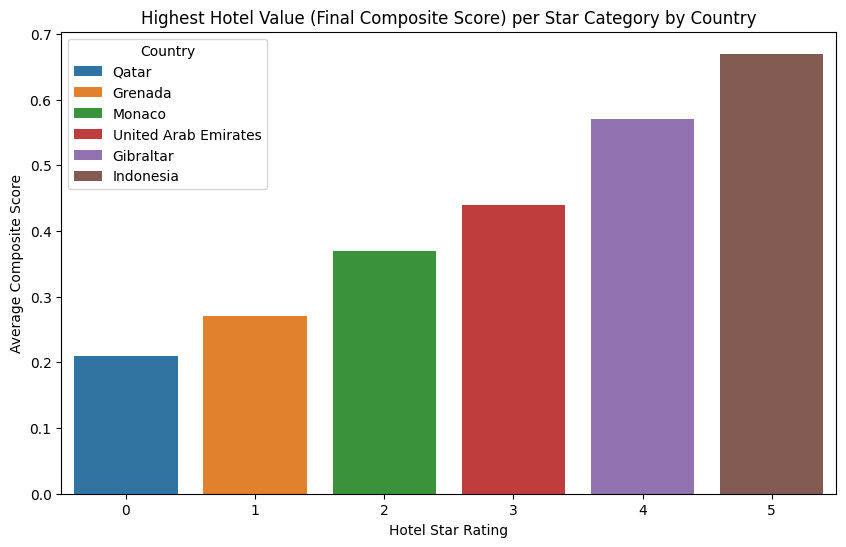

In [ ]:
# Group by country and HotelRating, get mean composite score
highest_score_per_star = (
    dashboard_df.groupby(["countyName", "HotelRating"])["Final_Composite_Score"]
    .mean()
    .reset_index()
    .round({"Final_Composite_Score": 2})
)

# Get country with highest score per star
highest_score_per_star = highest_score_per_star.loc[
    highest_score_per_star.groupby("HotelRating")["Final_Composite_Score"].idxmax()
].reset_index(drop=True)

# Rename for clarity
highest_score_per_star.rename(columns={"countyName":"Country", "Final_Composite_Score":"Avg_Score"}, inplace=True)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(
    data=highest_score_per_star,
    x="HotelRating",
    y="Avg_Score",
    hue="Country",
    dodge=False
)
plt.title("Highest Hotel Value (Final Composite Score) per Star Category by Country")
plt.xlabel("Hotel Star Rating")
plt.ylabel("Average Composite Score")
plt.legend(title="Country")
plt.show()


**Interpretation** 

- Final Composite Score” as a measure of hotel value:

Star Category 0: Qatar has the highest average composite score → hotels in Qatar in this category are likely the most valuable (or highest “rate” proxy) among 0-star hotels.

Star Category 5: Indonesia has the highest average composite score → 5-star hotels in Indonesia are likely the most valuable (or highest “rate” proxy) among 5-star hotels.

**2. What Hotel attributes (amenities, review count, rating, location) most influence pricing?**

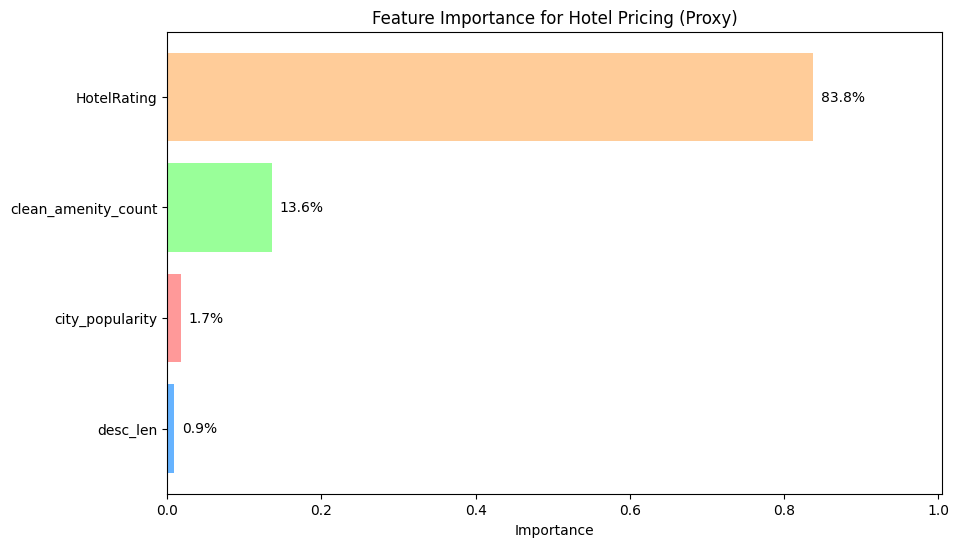

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Features and target
features = ['HotelRating', 'clean_amenity_count', 'city_popularity', 'desc_len']
X = dashboard_df[features]
y = dashboard_df['Final_Composite_Score']

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importance
importance = pd.Series(model.feature_importances_, index=features).sort_values()

# Horizontal bar chart
plt.figure(figsize=(10,6))
bars = plt.barh(importance.index, importance.values, color=['#66b3ff','#ff9999','#99ff99','#ffcc99'])
plt.xlabel('Importance')
plt.title('Feature Importance for Hotel Pricing (Proxy)')

# Add % labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width*100:.1f}%', va='center')

plt.xlim(0, max(importance.values)*1.2)
plt.show()


| Feature                 | Importance | Interpretation                                                                                                        |
| ----------------------- | ---------- | --------------------------------------------------------------------------------------------------------------------- |
| **HotelRating**         | 0.8377     | This dominates the “pricing” signal. Hotels with higher ratings strongly correlate with higher Final_Composite_Score. |
| **clean_amenity_count** | 0.1361     | Amenities like pools, gyms, breakfast, etc., moderately influence the score.                                          |
| **city_popularity**     | 0.0173     | Minimal effect. Popular cities slightly raise the score, but not significant.                                         |
| **desc_len**            | 0.0088     | Hotel description length has almost no effect.                                                                        |


**3. How can hotel chains/OTA's optimise partner portfolio by identifying underserved segments (example: budget hotels in permium city zones) or over-saturated markets?** 

**A. Identify Underserved Segments - High demand but low supply**

- Imagine a premium city zone like downtown New York
- Most hotels there are luxury hotels, with very high prices 
- Budget travelers struggle to find affordable options

Opportunity: A budget hotel chain or OTA can partner with budget hotels in this zone, because there is demand but not enough supply. This is an underserved segment.

**B. Identify Over Saturated Segments - High supply, high competition**

- Imagine a suburb with many mid-range hotels, all competing heavily for the same customers.
- Adding more hotels there might not increase revenue, because the market is already crowded.

Action: The hotel chain/OTA might avoid adding new partners here or use discounts/marketing to stand out, because it’s an over-saturated market.

**4. Which features [Hotel Facilities] drive pricing for clusters 0 [Mid Range], 1 [High Rated], and 2 [Low Rated]**


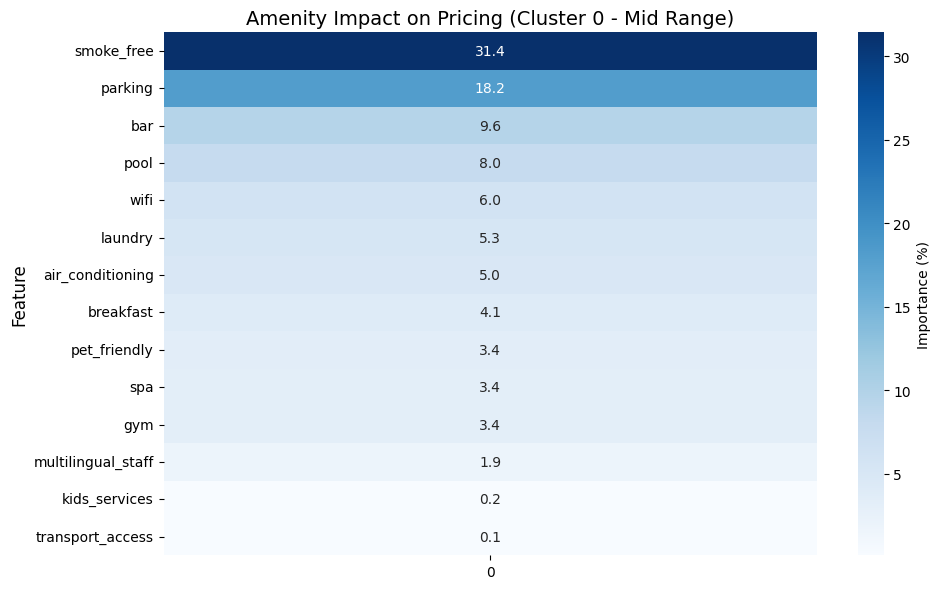

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Step 1: Filter Cluster 0
cluster_0_df = dashboard_df[dashboard_df['cluster'] == 0]

# Step 2: Select Features and Target
features = [ 'wifi', 'parking', 'pool', 'spa',
             'gym', 'bar', 'breakfast', 'air_conditioning', 'multilingual_staff',
             'pet_friendly', 'laundry', 'kids_services', 'transport_access', 'smoke_free']

X = cluster_0_df[features]
y = cluster_0_df['Final_Composite_Score']

# Step 3: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 4: Extract Feature Importance
importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# Step 5: Heatmap with Percentage Annotation
plt.figure(figsize=(10,6))
sns.heatmap(importance.to_frame() * 100, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label':'Importance (%)'})
plt.title('Amenity Impact on Pricing (Cluster 0 - Mid Range)', fontsize=14)
plt.ylabel('Feature', fontsize=12)
plt.xlabel('')
plt.tight_layout()
plt.show()


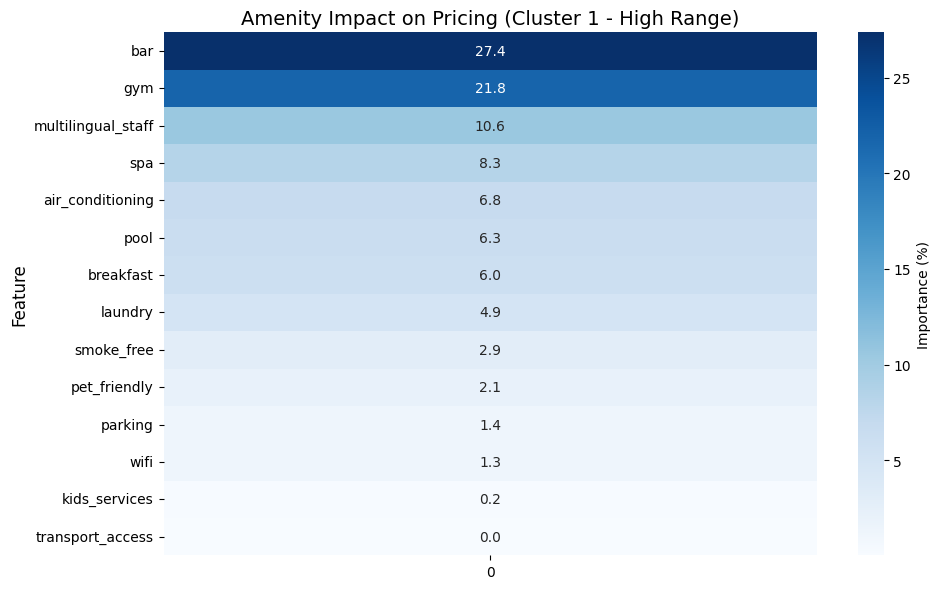

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Step 1: Filter Cluster 1
cluster_1_df = dashboard_df[dashboard_df['cluster'] == 1]

# Step 2: Select Features and Target
features = [ 'wifi', 'parking', 'pool', 'spa',
             'gym', 'bar', 'breakfast', 'air_conditioning', 'multilingual_staff',
             'pet_friendly', 'laundry', 'kids_services', 'transport_access', 'smoke_free']

X = cluster_1_df[features]
y = cluster_1_df['Final_Composite_Score']

# Step 3: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 4: Extract Feature Importance
importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# Step 5: Heatmap with Percentage Annotation
plt.figure(figsize=(10,6))
sns.heatmap(importance.to_frame() * 100, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label':'Importance (%)'})
plt.title('Amenity Impact on Pricing (Cluster 1 - High Range)', fontsize=14)
plt.ylabel('Feature', fontsize=12)
plt.xlabel('')
plt.tight_layout()
plt.show()


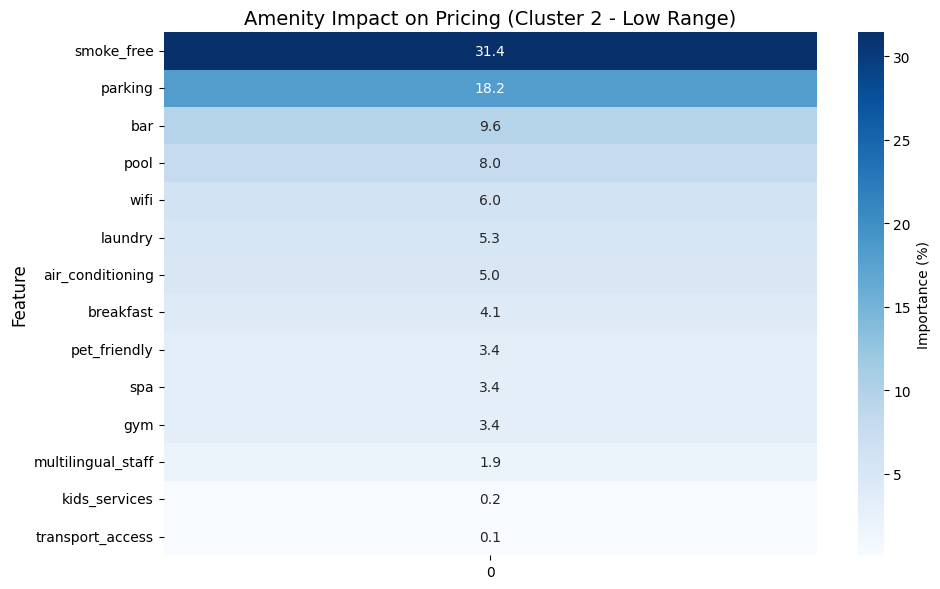

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Step 1: Filter Cluster 2
cluster_2_df = dashboard_df[dashboard_df['cluster'] == 2]

# Step 2: Select Features and Target
features = [ 'wifi', 'parking', 'pool', 'spa',
             'gym', 'bar', 'breakfast', 'air_conditioning', 'multilingual_staff',
             'pet_friendly', 'laundry', 'kids_services', 'transport_access', 'smoke_free']

X = cluster_0_df[features]
y = cluster_0_df['Final_Composite_Score']

# Step 3: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 4: Extract Feature Importance
importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# Step 5: Heatmap with Percentage Annotation
plt.figure(figsize=(10,6))
sns.heatmap(importance.to_frame() * 100, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label':'Importance (%)'})
plt.title('Amenity Impact on Pricing (Cluster 2 - Low Range)', fontsize=14)
plt.ylabel('Feature', fontsize=12)
plt.xlabel('')
plt.tight_layout()
plt.show()
